In [1]:
#import libraries
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
parse = lambda x: datetime.strptime(x, '%Y%m%d')

hurricane_raw = pd.read_csv('atlantic.csv', parse_dates = ['Date'], date_parser=parse)
hurricane_raw
hurricane_drop = hurricane_raw.drop(columns=['ID','Event','Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW','Unnamed: 22'], axis=1)
hurricane_drop.head()

,Name,Date,Time,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,UNNAMED,1851-06-25,0,HU,28.0N,94.8W,80,-999,-999,-999,-999,-999
1,UNNAMED,1851-06-25,600,HU,28.0N,95.4W,80,-999,-999,-999,-999,-999
2,UNNAMED,1851-06-25,1200,HU,28.0N,96.0W,80,-999,-999,-999,-999,-999
3,UNNAMED,1851-06-25,1800,HU,28.1N,96.5W,80,-999,-999,-999,-999,-999
4,UNNAMED,1851-06-25,2100,HU,28.2N,96.8W,80,-999,-999,-999,-999,-999


In [3]:
hurricane_drop.reset_index(inplace=True)
#Create new columns
hurricane_drop['day'] = hurricane_drop['Date'].dt.day
hurricane_drop['month'] = hurricane_drop['Date'].dt.month
hurricane_drop['year'] = hurricane_drop['Date'].dt.year

#date format AAAA|MM|DD
hurricane_drop.head()

,index,Name,Date,Time,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,High Wind NE,High Wind SE,High Wind SW,High Wind NW,day,month,year
0,0,UNNAMED,1851-06-25,0,HU,28.0N,94.8W,80,-999,-999,-999,-999,-999,25,6,1851
1,1,UNNAMED,1851-06-25,600,HU,28.0N,95.4W,80,-999,-999,-999,-999,-999,25,6,1851
2,2,UNNAMED,1851-06-25,1200,HU,28.0N,96.0W,80,-999,-999,-999,-999,-999,25,6,1851
3,3,UNNAMED,1851-06-25,1800,HU,28.1N,96.5W,80,-999,-999,-999,-999,-999,25,6,1851
4,4,UNNAMED,1851-06-25,2100,HU,28.2N,96.8W,80,-999,-999,-999,-999,-999,25,6,1851


In [4]:
hurricane_drop2 = hurricane_drop.drop(columns=['index'])
hurricane_drop2.shape
hurricane_drop2.head()
hurricane_sorted = hurricane_drop2.sort_values(by=['Date'])
hurricane_sorted.head()
hurricane = hurricane_sorted.rename(columns={'Maximum Wind':'Max_Wind','High Wind NE': 'Wind_NE', 
                                                  'High Wind SE': 'Wind_SE', 'High Wind SW': 'Wind_SW',
                                                  'High Wind NW': 'Wind_NW'})
hurricane.head() #49105 hurricanes

,Name,Date,Time,Status,Latitude,Longitude,Max_Wind,Minimum Pressure,Wind_NE,Wind_SE,Wind_SW,Wind_NW,day,month,year
0,UNNAMED,1851-06-25,0,HU,28.0N,94.8W,80,-999,-999,-999,-999,-999,25,6,1851
1,UNNAMED,1851-06-25,600,HU,28.0N,95.4W,80,-999,-999,-999,-999,-999,25,6,1851
2,UNNAMED,1851-06-25,1200,HU,28.0N,96.0W,80,-999,-999,-999,-999,-999,25,6,1851
3,UNNAMED,1851-06-25,1800,HU,28.1N,96.5W,80,-999,-999,-999,-999,-999,25,6,1851
4,UNNAMED,1851-06-25,2100,HU,28.2N,96.8W,80,-999,-999,-999,-999,-999,25,6,1851


In [5]:
#let's get all hurricanes for late 2013 
hurricane_late13 = hurricane[((hurricane['year']==2013)&(hurricane_sorted['month']==12))]
hurricane_late13.head()

,Name,Date,Time,Status,Latitude,Longitude,Max_Wind,Minimum Pressure,Wind_NE,Wind_SE,Wind_SW,Wind_NW,day,month,year
48450,UNNAMED,2013-12-03,1800,EX,34.3N,27.7W,50,1002,0,0,0,0,3,12,2013
48451,UNNAMED,2013-12-04,0,EX,33.9N,27.8W,55,1000,0,0,0,0,4,12,2013
48452,UNNAMED,2013-12-04,600,EX,33.1N,28.9W,55,997,0,0,0,0,4,12,2013
48453,UNNAMED,2013-12-04,1200,EX,32.2N,28.5W,50,995,0,0,0,0,4,12,2013
48454,UNNAMED,2013-12-04,1800,EX,31.9N,27.9W,50,995,0,0,0,0,4,12,2013


In [6]:
#and early 2014
hurricane14 = hurricane[((hurricane['year']==2014)&(hurricane_sorted['month']==6))]
hurricane14

,Name,Date,Time,Status,Latitude,Longitude,Max_Wind,Minimum Pressure,Wind_NE,Wind_SE,Wind_SW,Wind_NW,day,month,year
48466,ARTHUR,2014-06-28,1800,LO,32.0N,78.2W,20,1017,0,0,0,0,28,6,2014
48470,ARTHUR,2014-06-29,1800,LO,29.7N,77.2W,25,1015,0,0,0,0,29,6,2014
48469,ARTHUR,2014-06-29,1200,LO,30.0N,77.2W,20,1016,0,0,0,0,29,6,2014
48467,ARTHUR,2014-06-29,0,LO,31.2N,77.8W,20,1017,0,0,0,0,29,6,2014
48468,ARTHUR,2014-06-29,600,LO,30.5N,77.4W,20,1017,0,0,0,0,29,6,2014
48471,ARTHUR,2014-06-30,0,LO,29.5N,77.5W,25,1014,0,0,0,0,30,6,2014
48472,ARTHUR,2014-06-30,600,LO,29.2N,78.0W,25,1013,0,0,0,0,30,6,2014
48473,ARTHUR,2014-06-30,1200,LO,28.7N,78.4W,25,1011,0,0,0,0,30,6,2014
48474,ARTHUR,2014-06-30,1800,LO,28.1N,78.7W,30,1010,0,0,0,0,30,6,2014


In [7]:
#gap: [2013-12-07 <> 2014-06-28]

In [8]:
#let's get all hurricanes for 2013 
hurricane13 = hurricane[(hurricane['year']==2004)]
hurricane13.head()

,Name,Date,Time,Status,Latitude,Longitude,Max_Wind,Minimum Pressure,Wind_NE,Wind_SE,Wind_SW,Wind_NW,day,month,year
43104,ALEX,2004-07-31,1800,TD,30.3N,78.3W,25,1010,0,0,0,0,31,7,2004
43105,ALEX,2004-08-01,0,TD,31.0N,78.8W,25,1009,0,0,0,0,1,8,2004
43106,ALEX,2004-08-01,600,TD,31.5N,79.0W,25,1009,0,0,0,0,1,8,2004
43107,ALEX,2004-08-01,1200,TD,31.6N,79.1W,30,1009,0,0,0,0,1,8,2004
43108,ALEX,2004-08-01,1800,TS,31.6N,79.2W,35,1009,0,0,0,0,1,8,2004


In [9]:
#hurricanes for 2007, october-december
hurricane10_2004 = hurricane[(hurricane['year']==2004) & (hurricane['month']==10)]
hurricane11_2004 = hurricane[(hurricane['year']==2004) & (hurricane['month']==11)]
hurricane12_2004 = hurricane[(hurricane['year']==2004) & (hurricane['month']==12)]

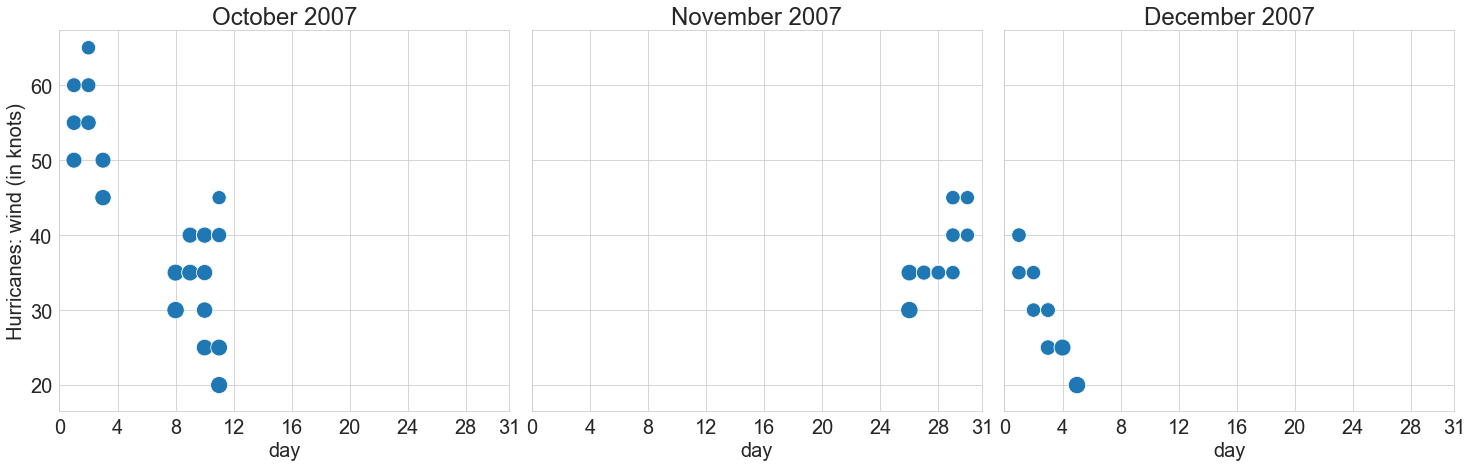

In [10]:
#plotting
plt.rcParams.update({'font.size': 20})
f, axes = plt.subplots(1, 3, figsize=(25, 7), sharey=True)
f.subplots_adjust(hspace=0.2, wspace=0.05)


sns.scatterplot(x="day", y="Max_Wind", data=hurricane10_2004, size='Minimum Pressure', sizes=(200, 300), legend=False, ax=axes[0]).set_title('October 2007')
sns.scatterplot(x="day", y="Max_Wind", data=hurricane11_2004, size='Minimum Pressure', sizes=(200, 300), legend=False, ax=axes[1]).set_title('November 2007')
sns.scatterplot(x="day", y="Max_Wind", data=hurricane12_2004, size='Minimum Pressure', sizes=(200, 300), legend=False, ax=axes[2]).set_title('December 2007')


for ax in f.get_axes():
    ax.label_outer()
    #ax.set_xlabel('days of the month')
    ax.set_ylabel('Hurricanes: wind (in knots)')
    ax.set_xticks([0,4,8,12,16,20,24,28,31])
    #ax.set_ylim([1,9])
    
